# Hotel Booking

Goal : Predict the chances of cancelation using data of costumers from multiple hotels.
The data is given in a tabular form of 32 columns (20 numerical + 12 objects).

Content:
1. Import and read the data
2. Data Analysis
3. Model

# 1. Import and read data:
* Import libraries
* Read and explore data : remove unimportant & incomplete data
* Split into train-val-test

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
path = r'C:\Users\omrig\Documents\Kaggle Projects\hotel-booking-demand'
file_name = '\hotel_bookings.csv'
data = pd.read_csv(path+file_name)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
data.info(), len(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

(None, 32)

In [ ]:
np.abs(data.corr()['is_canceled']).sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

In [ ]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
data = data.drop(labels = ['country', 'agent', 'company'], axis =1)
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [ ]:
# split the data to train-val-test
train_val, test = train_test_split(data, train_size=0.9, test_size=0.1, random_state=42)
train,val = train_test_split(train_val, train_size = 0.89, test_size=0.11, random_state=42)
len(data), len(train), len(val), len(test), len(train)/len(data)

(119390, 95631, 11820, 11939, 0.8009967333947566)

# 2. Data analysis
Includes:
* Data visualization
* Data cleaning
* Feature Engineering

### Features

* is_canceled : Value : indicating if the booking was canceled (1) or not (0)
* lead_time : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
* arrival_date_year : Year of arrival date

* arrival_date_week_number : Week number of year for arrival date
* arrival_date_day_of_month : Day of arrival date
* stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* stays_in_week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* adults : Number of adults
* children : Number of children
* babies : Number of babies

* country : Country of origin. Categories are represented in the ISO 3155–3:2013 format

* is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)
* previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking
* previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

* booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

* agentID of the travel agency that made the booking
* companyID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
* days_in_waiting_list - Number of days the booking was in the waiting list before it was confirmed to the customer

* adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
* required_car_parking_spaces : Number of car parking spaces required by the customer
* total_of_special_requests : Number of special requests made by the customer (e.g. twin bed or high floor)

* reservation_status_date : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

## Top Correlated Features

In [ ]:
# Check most correlated features
most_corr = np.abs(train.corr()['is_canceled']).sort_values(ascending=False)[1:7]
most_corr

lead_time                      0.292255
total_of_special_requests      0.233232
required_car_parking_spaces    0.196766
booking_changes                0.144194
previous_cancellations         0.110444
is_repeated_guest              0.086222
Name: is_canceled, dtype: float64

In [ ]:
#sns.pairplot(train[most_corr.index])

In [ ]:
train['is_canceled'].value_counts(normalize = True)

0    0.630779
1    0.369221
Name: is_canceled, dtype: float64

### lead_time 
Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
We will use lead-time as a one-feature-desicion criterion

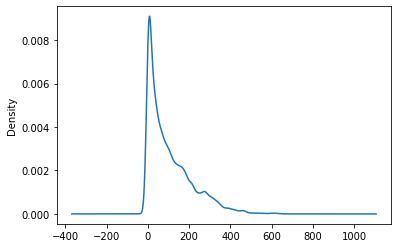

In [ ]:
train['lead_time'].plot(kind='kde')

In [ ]:
train['lead_time'].quantile(np.arange(0.1,1,0.1))
#np.arange(0.1,1,0.1)

0.1      2.0
0.2     11.0
0.3     26.0
0.4     44.0
0.5     69.0
0.6     99.0
0.7    137.0
0.8    184.0
0.9    265.0
Name: lead_time, dtype: float64

In [ ]:
qlt = pd.qcut(train['lead_time'],10, labels=False)
qlt_df=pd.concat([qlt, train['is_canceled']], axis=1)
qlt_df

,lead_time,is_canceled
17776,1,0
44109,3,1
77071,8,0
76770,9,1
58274,3,1
...,...,...
69605,6,1
60772,7,1
1898,7,1
74743,9,1


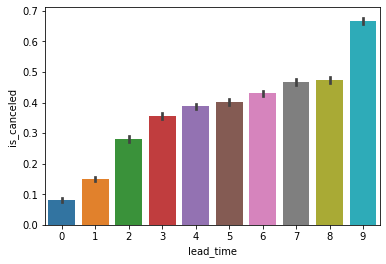

In [ ]:
sns.barplot(x= 'lead_time', y='is_canceled', data=qlt_df, )

In [ ]:
qlt_df['is_canceled'].groupby(qlt_df['lead_time']).value_counts(normalize=True)

lead_time  is_canceled
0          0              0.918026
           1              0.081974
1          0              0.849933
           1              0.150067
2          0              0.718812
           1              0.281188
3          0              0.642857
           1              0.357143
4          0              0.612533
           1              0.387467
5          0              0.598962
           1              0.401038
6          0              0.570161
           1              0.429839
7          0              0.532029
           1              0.467971
8          0              0.526045
           1              0.473955
9          1              0.667975
           0              0.332025
Name: is_canceled, dtype: float64

In [ ]:
qlt_df['lead_time'].groupby(qlt_df['is_canceled']).value_counts(normalize=True)

is_canceled  lead_time
0            0            0.145552
             1            0.136517
             2            0.113955
             3            0.100859
             4            0.099168
             5            0.093763
             6            0.089453
             7            0.085640
             8            0.083203
             9            0.051888
1            9            0.178340
             7            0.128692
             8            0.128069
             6            0.115211
             5            0.107253
             4            0.107168
             3            0.095726
             2            0.076156
             1            0.041179
             0            0.022204
Name: lead_time, dtype: float64

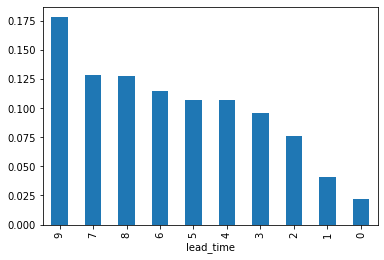

In [ ]:
qlt_df['lead_time'].groupby(qlt_df['is_canceled']).value_counts(normalize=True)[1].plot(kind='bar')

### Preliminary Accuracy Estimation
we will create an accuracy dataframe to monitor the quality of prediction at any step

In [ ]:
df_prediction = pd.DataFrame(columns = ['Score'])

#### One-feature-decision

In [ ]:
qlt_df['Decision'] = 0
#cond1  = (qlt_df['lead_time']==(11.0, 26.0]) | (qlt_df['lead_time']==(2.0, 11.0]) | ( qlt_df['lead_time']==(-0.001, 2.0])
qlt_df.loc[qlt_df['lead_time']>=7, 'Decision'] = 1
qlt_df

,lead_time,is_canceled,Decision
17776,1,0,0
44109,3,1,0
77071,8,0,1
76770,9,1,1
58274,3,1,0
...,...,...,...
69605,6,1,0
60772,7,1,1
1898,7,1,1
74743,9,1,1


In [ ]:
qlt_df['Decision'].value_counts(normalize=True)

0    0.700118
1    0.299882
Name: Decision, dtype: float64

In [ ]:
def print_score(prediction,validation,name):
    acc = np.round(accuracy_score(validation,prediction) * 100, 2)
    print('Accuracy Score : ',acc)
    df_prediction.loc[name,'Score'] = acc
    cm_norm = confusion_matrix(prediction,validation)/(confusion_matrix(prediction,validation).sum())
    return sns.heatmap(cm_norm, cmap='hot', annot=True)

Accuracy Score :  65.22


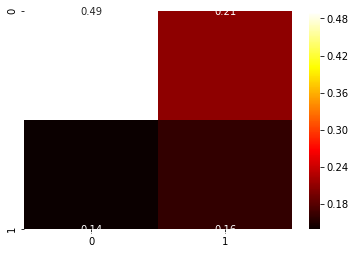

In [ ]:
print_score(qlt_df['Decision'],qlt_df['is_canceled'],'Top 1 Numeric Feat')

Intuitvely, the longer the lead-time is the probability of canceltion is growing.
* for the bottom centile (up to 2 days) the chances for cancelation are 8%
* for the 8th and 9th centile (137-265 days) the chances for cancelation are ~50%
* for the upper centile (more than a year) the chances for cancelation are 67%
* Prediction based solely on lead_time is no better than all-True ~65%

#### Top-5 correlated Festures based Decision
We will check the accuracy achieved for a minimal number of features without any feature engineering

In [ ]:
train_5 = train[most_corr.index.values]
train_5.head()

,lead_time,total_of_special_requests,required_car_parking_spaces,booking_changes,previous_cancellations,is_repeated_guest
17776,11,3,1,0,0,0
44109,30,0,0,0,0,0
77071,219,0,0,0,0,0
76770,395,0,0,0,1,0
58274,42,1,0,0,0,0


In [ ]:
train_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95631 entries, 17776 to 82769
Data columns (total 6 columns):
lead_time                      95631 non-null int64
total_of_special_requests      95631 non-null int64
required_car_parking_spaces    95631 non-null int64
booking_changes                95631 non-null int64
previous_cancellations         95631 non-null int64
is_repeated_guest              95631 non-null int64
dtypes: int64(6)
memory usage: 7.6 MB


In [ ]:
val_5 = val[most_corr.index.values]
val_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11820 entries, 79254 to 96045
Data columns (total 6 columns):
lead_time                      11820 non-null int64
total_of_special_requests      11820 non-null int64
required_car_parking_spaces    11820 non-null int64
booking_changes                11820 non-null int64
previous_cancellations         11820 non-null int64
is_repeated_guest              11820 non-null int64
dtypes: int64(6)
memory usage: 646.4 KB


In [ ]:
target_5 = train['is_canceled']
target_val_5 = val['is_canceled']

In [ ]:
rf_5 = RandomForestClassifier()
rf_5.fit(train_5, target_5)

C:\Users\omrig\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy Score :  75.44


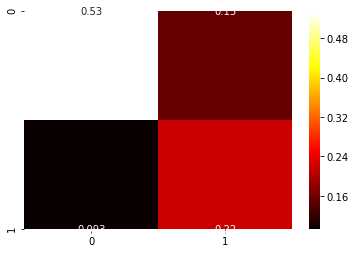

In [ ]:
rf5_pred = rf_5.predict(val_5)
print_score(rf5_pred,target_val_5,'Top 5 Numeric Feat')

Preliminary accuracy estimations shows that one feature is sufficient to reach an accuracy level of ~70% and five features are can yield a prediction with ~75% accuracy. Involvement of more features by categorical encoding, feature enginnering and hyperparameters optimization should give rise to a better result

### total_of_special_requests
Number of special requests made by the customer (e.g. twin bed or high floor)

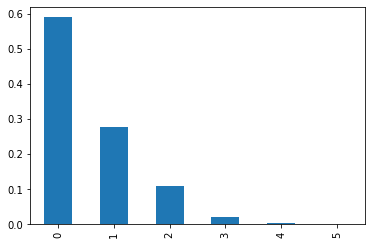

In [ ]:
train['total_of_special_requests'].value_counts(normalize=True).plot(kind='bar')

In [ ]:
train['is_canceled'].groupby(train['total_of_special_requests']).value_counts(normalize=True)

total_of_special_requests  is_canceled
0                          0              0.524791
                           1              0.475209
1                          0              0.780207
                           1              0.219793
2                          0              0.779494
                           1              0.220506
3                          0              0.821393
                           1              0.178607
4                          0              0.891386
                           1              0.108614
5                          0              0.928571
                           1              0.071429
Name: is_canceled, dtype: float64

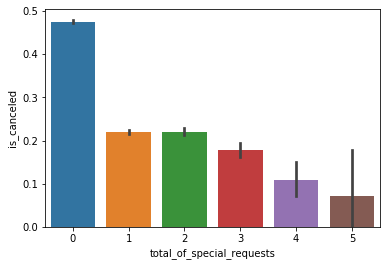

In [ ]:
sns.barplot(x='total_of_special_requests', y='is_canceled', data=train)

In [ ]:
qlt_df['total_of_special_requests']=train['total_of_special_requests']
qlt_df.pivot_table(index='lead_time', columns='total_of_special_requests', values='is_canceled')

total_of_special_requests,0,1,2,3,4,5
lead_time,,,,,,
0,0.099624,0.046475,0.057516,0.088710,0.076923,NaN
1,0.191000,0.109003,0.098546,0.079295,0.120000,NaN
2,0.357819,0.221455,0.163087,0.154506,0.142857,0.00
3,0.445022,0.259465,0.239243,0.192118,0.173913,0.25
4,0.506237,0.258314,0.215146,0.171296,0.228571,0.20
5,0.512150,0.255469,0.259082,0.188285,0.000000,0.00
6,0.553614,0.258797,0.273754,0.217778,0.083333,0.00
7,0.611613,0.260653,0.278761,0.158416,0.000000,0.00
8,0.585147,0.307913,0.306959,0.264423,0.127660,0.00


More special requests reduce the probability of cancelation 

### required_car_parking_spaces
The values of this feature arise several questions: 
* Is car space is actually a type of special request? in the sense that it indicates planning and ingagement
* Are car spaces correlated with the type of need? for example, in buissness trips or resorts it is more common to travel without a car
* Is more than one car space imply planning of many members? a fact that may increase the engagement but also the logistic complication

In [ ]:
train['required_car_parking_spaces'].value_counts(normalize=True)

0    0.937175
1    0.062553
2    0.000251
8    0.000010
3    0.000010
Name: required_car_parking_spaces, dtype: float64

In [ ]:
train['required_car_parking_spaces'].value_counts()

0    89623
1     5982
2       24
8        1
3        1
Name: required_car_parking_spaces, dtype: int64

In [ ]:
# it is obvious that more than two cars are rare and stated in a different category, 
#therefore we will change the classification of this feature, not enough data for 3 cars or more
train.loc[train['required_car_parking_spaces']>1,'required_car_parking_spaces']=2
val.loc[val['required_car_parking_spaces']>1,'required_car_parking_spaces']=2
test.loc[test['required_car_parking_spaces']>1,'required_car_parking_spaces']=2
train['required_car_parking_spaces'].value_counts()

C:\Users\omrig\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


0    89623
1     5982
2       26
Name: required_car_parking_spaces, dtype: int64

In [ ]:
train['is_canceled'].groupby(train['required_car_parking_spaces']).value_counts(normalize=True)

required_car_parking_spaces  is_canceled
0                            0              0.606027
                             1              0.393973
1                            0              1.000000
2                            0              1.000000
Name: is_canceled, dtype: float64

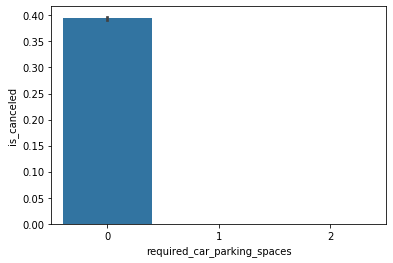

In [ ]:
sns.barplot(x = 'required_car_parking_spaces',y ='is_canceled', data=train)

The only cancelations are from people that does not ask for a parking space (who are 93% of the population)
the 7% who ask for a parking space do not cancel

In [ ]:
np.abs(train.corr()['required_car_parking_spaces']).sort_values(ascending=False)[1:7]

is_canceled                  0.197639
lead_time                    0.118087
total_of_special_requests    0.083828
is_repeated_guest            0.076542
booking_changes              0.065515
children                     0.059141
Name: required_car_parking_spaces, dtype: float64

#### hotel

In [ ]:
train['hotel'].groupby(train['required_car_parking_spaces']).value_counts()

required_car_parking_spaces  hotel       
0                            City Hotel      62020
                             Resort Hotel    27603
1                            Resort Hotel     4420
                             City Hotel       1562
2                            Resort Hotel       22
                             City Hotel          4
Name: hotel, dtype: int64

In [ ]:
train['required_car_parking_spaces'].groupby(train['hotel']).value_counts(normalize=True)

hotel         required_car_parking_spaces
City Hotel    0                              0.975372
              1                              0.024565
              2                              0.000063
Resort Hotel  0                              0.861382
              1                              0.137931
              2                              0.000687
Name: required_car_parking_spaces, dtype: float64

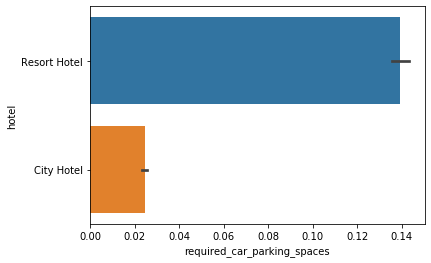

In [ ]:
sns.barplot(x='required_car_parking_spaces', y='hotel', data=train)

In [ ]:
# Checking if cancelation is correlated to the type of hotel, regardless to parking spaces
train['is_canceled'].groupby(train['hotel']).value_counts(normalize=True)

hotel         is_canceled
City Hotel    0              0.583949
              1              0.416051
Resort Hotel  0              0.723701
              1              0.276299
Name: is_canceled, dtype: float64

* Most reservations are without parking space request (94%), request of more than one parking space is rare, more than two is an outlier
* parking space requests are more common in resorts, however it is not highly correlated
* the 7% who ask for a parking space do not cancel the booking

### booking_changes
Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

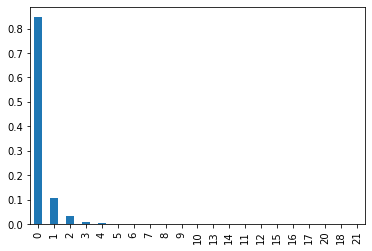

In [ ]:
train['booking_changes'].value_counts(normalize=True).plot(kind='bar')

In [ ]:
train['booking_changes'].value_counts(),train['booking_changes'].value_counts(normalize=True)

(0     81064
 1     10251
 2      3056
 3       748
 4       294
 5        98
 6        56
 7        22
 8        12
 9         7
 10        4
 13        3
 14        3
 11        2
 12        2
 15        2
 16        2
 17        2
 20        1
 18        1
 21        1
 Name: booking_changes, dtype: int64, 0     0.847675
 1     0.107193
 2     0.031956
 3     0.007822
 4     0.003074
 5     0.001025
 6     0.000586
 7     0.000230
 8     0.000125
 9     0.000073
 10    0.000042
 13    0.000031
 14    0.000031
 11    0.000021
 12    0.000021
 15    0.000021
 16    0.000021
 17    0.000021
 20    0.000010
 18    0.000010
 21    0.000010
 Name: booking_changes, dtype: float64)

In [ ]:
train.loc[train['booking_changes']>5,'booking_changes']=6
val.loc[val['booking_changes']>5,'booking_changes']=6
test.loc[test['booking_changes']>5,'booking_changes']=6
train['booking_changes'].value_counts(normalize=True)

0    0.847675
1    0.107193
2    0.031956
3    0.007822
4    0.003074
6    0.001255
5    0.001025
Name: booking_changes, dtype: float64

In [ ]:
train['is_canceled'].groupby(train['booking_changes']).value_counts(normalize=True)


booking_changes  is_canceled
0                0              0.592359
                 1              0.407641
1                0              0.859136
                 1              0.140864
2                0              0.802356
                 1              0.197644
3                0              0.844920
                 1              0.155080
4                0              0.802721
                 1              0.197279
5                0              0.816327
                 1              0.183673
6                0              0.800000
                 1              0.200000
Name: is_canceled, dtype: float64

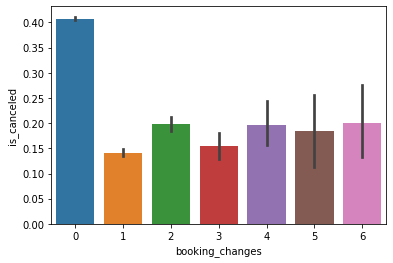

In [ ]:
sns.barplot(x='booking_changes',y='is_canceled',data=train)

looks like there is no significant difference between one change and multiple changes as far as it goes to cancellation

In [ ]:
train['is_change']=0
train.loc[train['booking_changes']>0,'is_change']=1
train[['is_change','booking_changes']][10:30]

C:\Users\omrig\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,is_change,booking_changes
69888,0,0
22052,0,0
108102,0,0
62874,0,0
20534,1,4
37351,0,0
49907,0,0
70965,0,0
54435,0,0
50721,1,1


In [ ]:
train.corr()[['is_change','booking_changes']]

,is_change,booking_changes
is_canceled,-0.187802,-0.151178
lead_time,-0.010221,0.001183
arrival_date_year,0.021439,0.033234
arrival_date_week_number,0.009226,0.008097
arrival_date_day_of_month,0.013376,0.011185
stays_in_weekend_nights,0.043972,0.058195
stays_in_week_nights,0.065684,0.088755
adults,-0.071656,-0.052302
children,0.054121,0.049915
babies,0.114892,0.094887


In [ ]:
np.abs(train.corr()['is_change']-train.corr()['booking_changes']).sort_values(ascending=False)[2:]

is_canceled                       0.036624
stays_in_week_nights              0.023070
babies                            0.020005
adults                            0.019354
stays_in_weekend_nights           0.014223
arrival_date_year                 0.011795
lead_time                         0.011405
total_of_special_requests         0.008243
previous_bookings_not_canceled    0.007046
is_repeated_guest                 0.005204
children                          0.004205
required_car_parking_spaces       0.003510
previous_cancellations            0.003374
arrival_date_day_of_month         0.002191
adr                               0.002019
days_in_waiting_list              0.001167
arrival_date_week_number          0.001129
dtype: float64

Is_change is not very diffrent from booking_changes, however it is more correlated to cancelation and babies/adults and less correlated to stays_in_week_nights. It is worth while to check the correlation between adults/babies to week nights/weekend nights

In [ ]:
# Replace booking_changes by is_change and apply changes to validation and test sets
val['is_change']=0
test['is_change']=0
val.loc[val['booking_changes']>0,'is_change']=1
test.loc[test['booking_changes']>0,'is_change']=1

train = train.drop('booking_changes',axis=1)
val = val.drop('booking_changes',axis=1)
test = test.drop('booking_changes',axis=1)

train.head()

C:\Users\omrig\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\omrig\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_change
17776,Resort Hotel,0,11,2015,October,42,14,2,5,2,...,E,No Deposit,0,Transient,116.71,1,3,Check-Out,2015-10-21,0
44109,City Hotel,1,30,2015,September,40,30,0,2,2,...,A,Non Refund,0,Transient,121.00,0,0,Canceled,2015-09-15,0
77071,City Hotel,0,219,2015,September,36,4,0,1,2,...,A,No Deposit,0,Transient-Party,108.00,0,0,Check-Out,2015-09-05,0
76770,City Hotel,1,395,2016,March,13,21,1,2,2,...,A,Non Refund,0,Transient,62.80,0,0,Canceled,2015-08-10,0
58274,City Hotel,1,42,2016,October,42,10,1,0,2,...,A,No Deposit,0,Transient,126.00,0,1,Canceled,2016-10-09,0


In [ ]:
train.corr()['is_change'].sort_values(ascending=False)[1:7]

babies                         0.114892
required_car_parking_spaces    0.073733
stays_in_week_nights           0.065684
children                       0.054121
total_of_special_requests      0.048683
stays_in_weekend_nights        0.043972
Name: is_change, dtype: float64

In [ ]:
train.corr()['is_change'].sort_values(ascending=True)[:7]

is_canceled                 -0.187802
adults                      -0.071656
previous_cancellations      -0.031558
days_in_waiting_list        -0.011791
lead_time                   -0.010221
arrival_date_week_number     0.009226
arrival_date_day_of_month    0.013376
Name: is_change, dtype: float64

changes are slightly correlated to babies/car_space and children and negatively correlated to cancelations and adults
It is worth analyzing if changes without children and babies are different from other cancelations

In [ ]:
train.pivot_table(index='is_change', columns='babies',values='is_canceled')

babies,0,1,2
is_change,,,
0,0.408294,0.218182,0.250000
1,0.155537,0.151982,0.142857


Focusing on the population that makes changes, it does not matter if they have babies or not

### previous_cancellations
Number of previous bookings that were cancelled by the customer prior to the current booking

In [ ]:
train['previous_cancellations'].value_counts().sort_index()

0     90458
1      4816
2        98
3        51
4        27
5        15
6        20
11       26
13       10
14       13
19       15
21        1
24       43
25       19
26       19
Name: previous_cancellations, dtype: int64

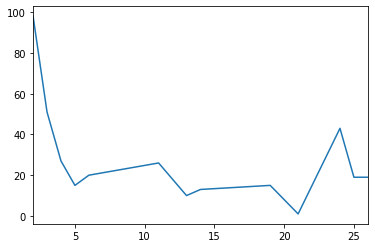

In [ ]:
train['previous_cancellations'].value_counts().sort_index()[2:].plot()

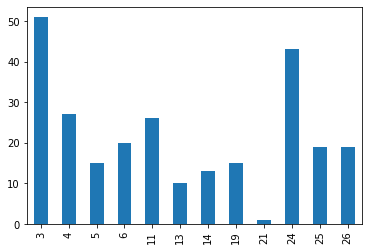

In [ ]:
train['previous_cancellations'].value_counts().sort_index()[3:].plot(kind='bar')

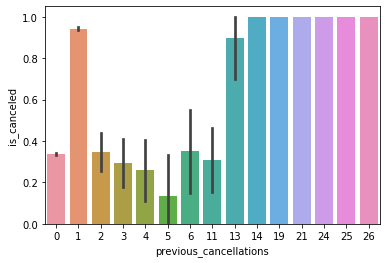

In [ ]:
prc = train['previous_cancellations']
sns.barplot(x='previous_cancellations',y='is_canceled',data=train)

It is clear that cancelation is varying with previous_cancellations in a non-monotonic manner, it can be categorized into 4 populations: 
* 0 : with ~30% cancelations
* 1 : with ~90% cancelations! 
* 2 - 11 : with higly varying cancelations of 10%-50%
* more than 12 : with 100% cancelations

We can categorize the data accordingly all to a new scale of categories: 0,1,2,3, however the data is too small and the distribtion does not make a lot of sense. It appears that other parameter may be involved.
We can engineer the features in a way they will make more sense by checking correlation with other features

In [ ]:
np.abs(train.corr()['previous_cancellations']).sort_values(ascending=False)[1:]

previous_bookings_not_canceled    0.153742
arrival_date_year                 0.119770
is_canceled                       0.110444
lead_time                         0.085560
is_repeated_guest                 0.081881
adr                               0.065349
total_of_special_requests         0.048272
arrival_date_week_number          0.035267
is_change                         0.031558
arrival_date_day_of_month         0.027001
children                          0.024284
required_car_parking_spaces       0.019343
stays_in_weekend_nights           0.012344
stays_in_week_nights              0.012096
babies                            0.007928
adults                            0.006511
days_in_waiting_list              0.005593
Name: previous_cancellations, dtype: float64

In [ ]:
train['previous_bookings_not_canceled'].value_counts()

0     92682
1      1252
2       478
3       276
4       182
      ...  
35        1
34        1
33        1
62        1
63        1
Name: previous_bookings_not_canceled, Length: 62, dtype: int64

In [ ]:
# we will create a new feature of the cancelation percentage
total_canc = train['previous_bookings_not_canceled'] + train['previous_cancellations']
train['previous_cancellation_per'] =  train['previous_cancellations'].div(total_canc)
train['previous_cancellation_per'] = train['previous_cancellation_per'].fillna(0)
train[['previous_cancellations','previous_bookings_not_canceled','previous_cancellation_per']]

,previous_cancellations,previous_bookings_not_canceled,previous_cancellation_per
17776,0,0,0.0
44109,0,0,0.0
77071,0,0,0.0
76770,1,0,1.0
58274,0,0,0.0
...,...,...,...
69605,0,0,0.0
60772,0,0,0.0
1898,0,0,0.0
74743,1,0,1.0


In [ ]:
train['previous_cancellation_per'].value_counts()

0.000000    90458
1.000000     4641
0.500000       53
0.250000       41
0.166667       39
            ...  
0.129032        1
0.555556        1
0.063830        1
0.407407        1
0.214286        1
Name: previous_cancellation_per, Length: 99, dtype: int64

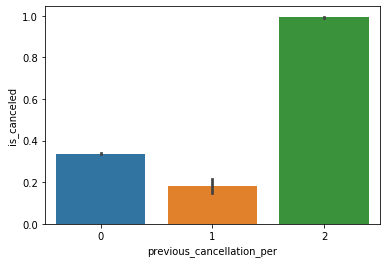

In [ ]:
bins = [-1,0,0.5,1]
train['previous_cancellation_per'] =  pd.cut(train['previous_cancellation_per'], bins, labels = [0,1,2])
sns.barplot(x='previous_cancellation_per',y='is_canceled',data=train)

In [ ]:
train['previous_cancellation_per'] = train['previous_cancellation_per'].astype('int64')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95631 entries, 17776 to 82769
Data columns (total 30 columns):
hotel                             95631 non-null object
is_canceled                       95631 non-null int64
lead_time                         95631 non-null int64
arrival_date_year                 95631 non-null int64
arrival_date_month                95631 non-null object
arrival_date_week_number          95631 non-null int64
arrival_date_day_of_month         95631 non-null int64
stays_in_weekend_nights           95631 non-null int64
stays_in_week_nights              95631 non-null int64
adults                            95631 non-null int64
children                          95627 non-null float64
babies                            95631 non-null int64
meal                              95631 non-null object
market_segment                    95631 non-null object
distribution_channel              95631 non-null object
is_repeated_guest                 95631 non-null int64


In [ ]:
np.abs(train.corr()[['previous_cancellation_per','previous_cancellations']]).sort_values(ascending=False,by='previous_cancellation_per')
train[['previous_cancellation_per','previous_cancellations','previous_bookings_not_canceled','is_canceled']].corr()

,previous_cancellation_per,previous_cancellations,previous_bookings_not_canceled,is_canceled
previous_cancellation_per,1.000000,0.420492,0.076717,0.285071
previous_cancellations,0.420492,1.000000,0.153742,0.110444
previous_bookings_not_canceled,0.076717,0.153742,1.000000,-0.057145
is_canceled,0.285071,0.110444,-0.057145,1.000000


The new feature 'previous_cancellation_per' which was constructed from 'previous_cancellations' and 'previous_bookings_not_canceled' is correlated much better to the target parameter 'is_canceled'. It comes as no surprise as its distribution in relation to cancelation makes more sense. As 'previous_bookings_not_canceled' still hold some information 'previous_cancellations' can only confuse the model, therefore we will use 'previous_cancellation_per' instead.

In [ ]:
def add_previous_cancelation_per(df):
    total_canc = df['previous_bookings_not_canceled'] + df['previous_cancellations']
    df['previous_cancellation_per'] =  df['previous_cancellations'].div(total_canc)
    df['previous_cancellation_per'] = df['previous_cancellation_per'].fillna(0)
    bins = [-1,0,0.5,1]
    df['previous_cancellation_per'] =  pd.cut(df['previous_cancellation_per'], bins, labels = [0,1,2])
    df['previous_cancellation_per'] = df['previous_cancellation_per'].astype('int64')
    df = df.drop('previous_cancellations',axis=1)
    return df

val = add_previous_cancelation_per(val)
test = add_previous_cancelation_per(test)
train = train.drop('previous_cancellations',axis=1)

In [ ]:
val['previous_cancellation_per'].value_counts()

0    11174
2      598
1       48
Name: previous_cancellation_per, dtype: int64

### is_repeated_guest

In [ ]:
train['is_repeated_guest'].value_counts(normalize=True)

0    0.967699
1    0.032301
Name: is_repeated_guest, dtype: float64

In [ ]:
train['is_canceled'].groupby(train['is_repeated_guest']).value_counts(normalize=True)

is_repeated_guest  is_canceled
0                  0              0.623177
                   1              0.376823
1                  0              0.858530
                   1              0.141470
Name: is_canceled, dtype: float64

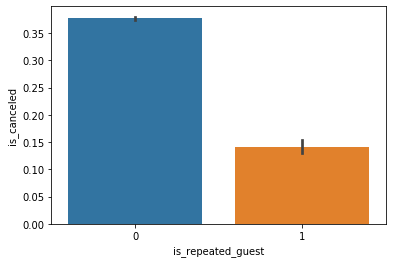

In [ ]:
sns.barplot(x='is_repeated_guest',y='is_canceled',data=train)

Repeated guests tend to cancel less

## Other Numerical Features

In [ ]:
num_feat = list(train.columns[(train.dtypes.values=='int64')|(train.dtypes.values=='float64')])
non_num_feat = list(train.columns[(train.dtypes.values!='int64')&(train.dtypes.values!='float64')])
num_feat, non_num_feat

(['is_canceled',
  'lead_time',
  'arrival_date_year',
  'arrival_date_week_number',
  'arrival_date_day_of_month',
  'stays_in_weekend_nights',
  'stays_in_week_nights',
  'adults',
  'children',
  'babies',
  'is_repeated_guest',
  'previous_bookings_not_canceled',
  'days_in_waiting_list',
  'adr',
  'required_car_parking_spaces',
  'total_of_special_requests',
  'is_change',
  'previous_cancellation_per'],
 ['hotel',
  'arrival_date_month',
  'meal',
  'market_segment',
  'distribution_channel',
  'reserved_room_type',
  'assigned_room_type',
  'deposit_type',
  'customer_type',
  'reservation_status',
  'reservation_status_date'])

In [ ]:
if 'is_canceled' in num_feat:
    num_feat.remove('is_canceled')
if 'is_change' in num_feat:
    num_feat.remove('is_change')
if 'previous_cancellation_per' in num_feat:
    num_feat.remove('previous_cancellation_per')
if 'previous_bookings_not_canceled' in num_feat:
    num_feat.remove('previous_bookings_not_canceled')
    
for item in list(most_corr.index):
    if item in num_feat:
        num_feat.remove(item)
num_feat

['arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'days_in_waiting_list',
 'adr']

In [ ]:
train[num_feat]

,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,days_in_waiting_list,adr
17776,2015,42,14,2,5,2,0.0,0,0,116.71
44109,2015,40,30,0,2,2,0.0,0,0,121.00
77071,2015,36,4,0,1,2,0.0,0,0,108.00
76770,2016,13,21,1,2,2,0.0,0,0,62.80
58274,2016,42,10,1,0,2,0.0,0,0,126.00
...,...,...,...,...,...,...,...,...,...,...
69605,2017,22,2,1,2,2,0.0,0,0,130.00
60772,2016,48,20,2,3,2,0.0,0,0,85.00
1898,2015,39,20,2,5,2,0.0,0,0,66.60
74743,2015,37,11,2,3,1,0.0,0,0,80.00


The rest of the columns can be classified to three:
* date (year,weak number,day)
* stays in week/weekends nights
* number of guests (adults/children/babies)
* address

In [ ]:
train[num_feat].isna().sum()

arrival_date_year            0
arrival_date_week_number     0
arrival_date_day_of_month    0
stays_in_weekend_nights      0
stays_in_week_nights         0
adults                       0
children                     4
babies                       0
days_in_waiting_list         0
adr                          0
dtype: int64

Four points of missing values are insignificant, however, as it is the only missing values to fill I will demonstrate data cleaning on them by correlating to another feature

### Children

In [ ]:
np.abs(train.corr()['children']).sort_values(ascending=False)[1:6]

adr                            0.317737
total_of_special_requests      0.082646
required_car_parking_spaces    0.059141
is_change                      0.054121
arrival_date_year              0.053611
Name: children, dtype: float64

Most correlated feature: adr
* adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

In [ ]:
train['adr'].groupby(train['children']).median()

children
0.0     90.67
1.0    134.10
2.0    180.00
3.0    218.80
Name: adr, dtype: float64

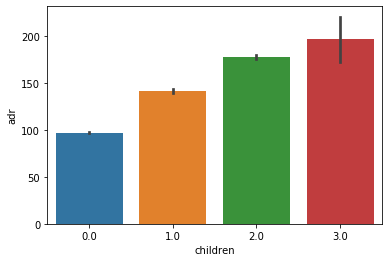

In [ ]:
sns.barplot(x='children', y='adr', data=train)

In the absence of a better measure and given the fact that the 'adr' is extremely low we will predict children=0 for all na samples

In [ ]:
train.loc[train['children'].isnull(),'children']=0
train.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
is_change                   

## None numerical features
None numerical features were not considered when the most correlated features were calculated\
The category encoders that may be used:
* Simple encoding for ordinal features -> 0,1,2...
* get_dummies, split a category to binary features
* Target encoding - mean value of a category in relation to the target, to avoid overfitting we will use Leave-One-Out

The features are:
* hotel : Hotel (H1 = Resort Hotel or H2 = City Hotel)
* arrival_date_month : Month of arrival date
* meal : Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
* market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
* distribution_channel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
* reserved_room_type : Code of room type reserved. Code is presented instead of designation for anonymity reasons.
* assigned_room_type : Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
* deposit_type : Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
* customer_type : Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
* reservation_status : Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

In [ ]:
cat_flag = False
train[non_num_feat].head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
17776,Resort Hotel,October,HB,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2015-10-21
44109,City Hotel,September,HB,Offline TA/TO,TA/TO,A,A,Non Refund,Transient,Canceled,2015-09-15
77071,City Hotel,September,HB,Offline TA/TO,TA/TO,A,A,No Deposit,Transient-Party,Check-Out,2015-09-05
76770,City Hotel,March,BB,Groups,TA/TO,A,A,Non Refund,Transient,Canceled,2015-08-10
58274,City Hotel,October,BB,Online TA,TA/TO,A,A,No Deposit,Transient,Canceled,2016-10-09


In [ ]:
# Create a dataframe of all the unique categories
cat_df = pd.DataFrame(index = non_num_feat, columns = ['Unique Values', 'Number of Categories'])
for feature in non_num_feat:
    cat_df.loc[feature,'Unique Values'] = train[feature].unique()
    cat_df.loc[feature,'Number of Categories'] = len(train[feature].unique())
cat_df.drop('reservation_status_date', axis=0, inplace=True)
cat_df

,Unique Values,Number of Categories
hotel,"[Resort Hotel, City Hotel]",2
arrival_date_month,"[October, September, March, February, December...",12
meal,"[HB, BB, SC, FB, Undefined]",5
market_segment,"[Online TA, Offline TA/TO, Groups, Corporate, ...",8
distribution_channel,"[TA/TO, Corporate, Direct, GDS, Undefined]",5
reserved_room_type,"[E, A, D, F, H, C, G, B, L, P]",10
assigned_room_type,"[E, A, D, B, F, H, C, G, K, I, P, L]",12
deposit_type,"[No Deposit, Non Refund, Refundable]",3
customer_type,"[Transient, Transient-Party, Contract, Group]",4
reservation_status,"[Check-Out, Canceled, No-Show]",3


In [ ]:
train['deposit_type'].value_counts()

No Deposit    83854
Non Refund    11652
Refundable      125
Name: deposit_type, dtype: int64

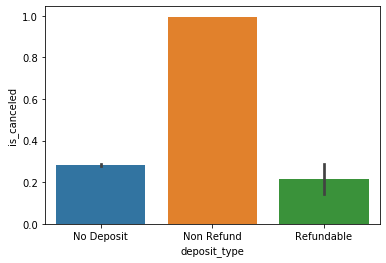

In [ ]:
sns.barplot(x='deposit_type',y='is_canceled', data = train)

In [ ]:
train['reservation_status'].value_counts()

Check-Out    60322
Canceled     34347
No-Show        962
Name: reservation_status, dtype: int64

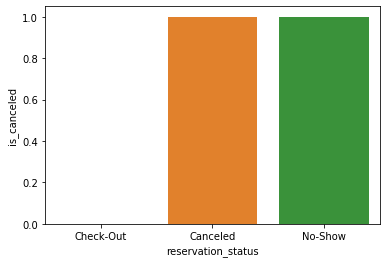

In [ ]:
sns.barplot(x='reservation_status', y='is_canceled', data = train)

The correlation between the target and the reservation status  is much too high, suggesting that the feature is actually bound to the target, as it will probably cause data leakage we'll later remove it from the data

In [ ]:
def dummies(df,var,prefix=None):
    dummies = pd.get_dummies(df[var], prefix = prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(var, axis=1)
    return df

def set_cat_feat(df):

    #Ordinal/binary parameters   
    month = {
        'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,\
        'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
    hotel = { 'Resort Hotel' : 0, 'City Hotel' : 1}
    df['arrival_date_month'] = df['arrival_date_month'].map(month)
    df['hotel'] = df['hotel'].map(hotel)
    
    df['assigned/reserved'] = 0
    df.loc[df['reserved_room_type']==df['assigned_room_type'],'assigned/reserved']=1
    df = df.drop('reserved_room_type', axis=1)
    df = df.drop('assigned_room_type', axis =1)
    
    df = df.drop('reservation_status', axis=1)
    
    dummy_feat = ['meal','market_segment','distribution_channel','customer_type','deposit_type']
    dummy_prefix=['meal','MS','DC','CT','DT']
    
    # get_dummies for parameters with a few categories, as we face classification problem no need to drop any category
    for i in range(len(dummy_feat)):
        df = dummies(df,dummy_feat[i],dummy_prefix[i])

    return df

In [ ]:
temp = train.loc[:,non_num_feat+ ['is_canceled']]
temp

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,is_canceled
17776,Resort Hotel,October,HB,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2015-10-21,0
44109,City Hotel,September,HB,Offline TA/TO,TA/TO,A,A,Non Refund,Transient,Canceled,2015-09-15,1
77071,City Hotel,September,HB,Offline TA/TO,TA/TO,A,A,No Deposit,Transient-Party,Check-Out,2015-09-05,0
76770,City Hotel,March,BB,Groups,TA/TO,A,A,Non Refund,Transient,Canceled,2015-08-10,1
58274,City Hotel,October,BB,Online TA,TA/TO,A,A,No Deposit,Transient,Canceled,2016-10-09,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69605,City Hotel,June,BB,Groups,TA/TO,A,A,Non Refund,Transient,Canceled,2017-01-24,1
60772,City Hotel,November,BB,Online TA,TA/TO,A,A,No Deposit,Transient,Canceled,2016-07-02,1
1898,Resort Hotel,September,BB,Online TA,TA/TO,A,A,No Deposit,Transient,Canceled,2015-04-18,1
74743,City Hotel,September,BB,Offline TA/TO,TA/TO,A,A,Non Refund,Transient,Canceled,2015-02-20,1


In [ ]:
# Apply changes in all the datasets
if cat_flag == False:
    print('Perform encoding...')
    train = set_cat_feat(train)
    val = set_cat_feat(val)
    test = set_cat_feat(test)
    cat_flag=True

train.head(10)

Perform encoding...


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,DC_GDS,DC_TA/TO,DC_Undefined,CT_Contract,CT_Group,CT_Transient,CT_Transient-Party,DT_No Deposit,DT_Non Refund,DT_Refundable
17776,0,0,11,2015,10,42,14,2,5,2,...,0,1,0,0,0,1,0,1,0,0
44109,1,1,30,2015,9,40,30,0,2,2,...,0,1,0,0,0,1,0,0,1,0
77071,1,0,219,2015,9,36,4,0,1,2,...,0,1,0,0,0,0,1,1,0,0
76770,1,1,395,2016,3,13,21,1,2,2,...,0,1,0,0,0,1,0,0,1,0
58274,1,1,42,2016,10,42,10,1,0,2,...,0,1,0,0,0,1,0,1,0,0
106377,1,0,7,2017,2,7,18,2,5,2,...,0,1,0,0,0,1,0,1,0,0
64294,1,1,85,2017,3,9,4,2,4,2,...,0,1,0,0,0,1,0,1,0,0
82467,1,0,53,2015,12,53,29,0,2,2,...,0,1,0,1,0,0,0,1,0,0
18481,0,0,0,2015,11,47,17,0,4,1,...,0,0,0,0,0,0,1,1,0,0
36692,0,0,13,2017,5,21,21,2,4,2,...,0,1,0,0,0,0,1,1,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95631 entries, 17776 to 82769
Data columns (total 47 columns):
hotel                             95631 non-null int64
is_canceled                       95631 non-null int64
lead_time                         95631 non-null int64
arrival_date_year                 95631 non-null int64
arrival_date_month                95631 non-null int64
arrival_date_week_number          95631 non-null int64
arrival_date_day_of_month         95631 non-null int64
stays_in_weekend_nights           95631 non-null int64
stays_in_week_nights              95631 non-null int64
adults                            95631 non-null int64
children                          95631 non-null float64
babies                            95631 non-null int64
is_repeated_guest                 95631 non-null int64
previous_bookings_not_canceled    95631 non-null int64
days_in_waiting_list              95631 non-null int64
adr                               95631 non-null float64
req

### Dates
reservation_status_date 
* reservation_status : Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

In [ ]:
object_list = train.dtypes.index[train.dtypes=='object'].values
object_list

array(['reservation_status_date'], dtype=object)

In [ ]:
object_feat = object_list[0] # reservation_status_date
minibatch = train.loc[:,[object_feat]]
minibatch

,reservation_status_date
17776,2015-10-21
44109,2015-09-15
77071,2015-09-05
76770,2015-08-10
58274,2016-10-09
...,...
69605,2017-01-24
60772,2016-07-02
1898,2015-04-18
74743,2015-02-20


In [ ]:
minibatch[['res_year','res_month','res_day']] = minibatch[object_feat].str.split('-', expand=True).astype(int)
minibatch

,reservation_status_date,res_year,res_month,res_day
17776,2015-10-21,2015,10,21
44109,2015-09-15,2015,9,15
77071,2015-09-05,2015,9,5
76770,2015-08-10,2015,8,10
58274,2016-10-09,2016,10,9
...,...,...,...,...
69605,2017-01-24,2017,1,24
60772,2016-07-02,2016,7,2
1898,2015-04-18,2015,4,18
74743,2015-02-20,2015,2,20


In [ ]:
minibatch['res_year'].value_counts(normalize=True)

2016    0.484832
2017    0.305476
2015    0.208248
2014    0.001443
Name: res_year, dtype: float64

In [ ]:
train['arrival_date_year' ].value_counts(normalize=True)

2016    0.475683
2017    0.340423
2015    0.183894
Name: arrival_date_year, dtype: float64

In [ ]:
def adjust_dates(df):
    object_feat = 'reservation_status_date'
    df[['res_year','res_month','res_day']] = df[object_feat].str.split('-', expand=True).astype(int)
    df = df.drop(object_feat, axis = 1)
    years_dict = {2014:1,2015:2,2016:3,2017:4}
    df['res_year'] = df['res_year'].map(years_dict)
    df['arrival_date_year'] = df['arrival_date_year'].map(years_dict)
    
    return df

In [ ]:
train = adjust_dates(train)
val = adjust_dates(val)
test = adjust_dates(test) 

## Final Preprocessing

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95631 entries, 17776 to 82769
Data columns (total 49 columns):
hotel                             95631 non-null int64
is_canceled                       95631 non-null int64
lead_time                         95631 non-null int64
arrival_date_year                 95631 non-null int64
arrival_date_month                95631 non-null int64
arrival_date_week_number          95631 non-null int64
arrival_date_day_of_month         95631 non-null int64
stays_in_weekend_nights           95631 non-null int64
stays_in_week_nights              95631 non-null int64
adults                            95631 non-null int64
children                          95631 non-null float64
babies                            95631 non-null int64
is_repeated_guest                 95631 non-null int64
previous_bookings_not_canceled    95631 non-null int64
days_in_waiting_list              95631 non-null int64
adr                               95631 non-null float64
req

In [ ]:
missing_test = train.columns.values.tolist()
for i in train.columns.values:
    for j in test.columns.values:
        if i==j:
            missing_test.remove(i)
missing_val = train.columns.values.tolist()
for i in train.columns.values:
    for j in val.columns.values:
        if i==j:
            missing_val.remove(i)
missing_test, missing_val

(['MS_Undefined', 'DC_Undefined'], ['MS_Undefined', 'DC_Undefined'])

In [ ]:
for col in missing_val:
    val[col]=0
for col in missing_test:
    test[col]=0

test.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,CT_Transient,CT_Transient-Party,DT_No Deposit,DT_Non Refund,DT_Refundable,res_year,res_month,res_day,MS_Undefined,DC_Undefined
30946,0,0,203,3,12,49,2,2,5,2,...,1,0,1,0,0,3,12,9,0,0
40207,1,1,82,2,7,29,16,0,3,2,...,1,0,1,0,0,2,7,16,0,0
103708,1,0,25,3,12,53,27,0,3,3,...,0,1,1,0,0,3,12,30,0,0
85144,1,0,1,3,3,11,9,0,1,1,...,0,1,1,0,0,3,3,10,0,0
109991,1,0,70,4,4,16,16,2,2,2,...,1,0,1,0,0,4,4,20,0,0


In [ ]:
# Resort the columns
train = train.reindex(sorted(train.columns), axis=1)
val = val.reindex(sorted(train.columns), axis=1)
test = test.reindex(sorted(train.columns), axis=1)
train.head()

,CT_Contract,CT_Group,CT_Transient,CT_Transient-Party,DC_Corporate,DC_Direct,DC_GDS,DC_TA/TO,DC_Undefined,DT_No Deposit,...,meal_Undefined,previous_bookings_not_canceled,previous_cancellation_per,required_car_parking_spaces,res_day,res_month,res_year,stays_in_week_nights,stays_in_weekend_nights,total_of_special_requests
17776,0,0,1,0,0,0,0,1,0,1,...,0,0,0,1,21,10,2,5,2,3
44109,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,15,9,2,2,0,0
77071,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,5,9,2,1,0,0
76770,0,0,1,0,0,0,0,1,0,0,...,0,0,2,0,10,8,2,2,1,0
58274,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,9,10,3,0,1,1


In [ ]:
val.head()

,CT_Contract,CT_Group,CT_Transient,CT_Transient-Party,DC_Corporate,DC_Direct,DC_GDS,DC_TA/TO,DC_Undefined,DT_No Deposit,...,meal_Undefined,previous_bookings_not_canceled,previous_cancellation_per,required_car_parking_spaces,res_day,res_month,res_year,stays_in_week_nights,stays_in_weekend_nights,total_of_special_requests
79254,0,0,1,0,0,0,0,1,0,0,...,0,0,2,0,23,10,2,3,0,0
109300,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,9,4,4,5,0,2
56052,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,6,7,3,1,2,0
37917,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,3,7,4,2,1,1
96642,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,5,9,3,3,1,1


In [ ]:
np.abs(train.corr()['is_canceled']).sort_values(ascending = False)

is_canceled                       1.000000
DT_Non Refund                     0.481700
DT_No Deposit                     0.478231
lead_time                         0.292255
previous_cancellation_per         0.285071
assigned/reserved                 0.246208
total_of_special_requests         0.233232
MS_Groups                         0.220563
required_car_parking_spaces       0.197639
is_change                         0.187802
DC_TA/TO                          0.174981
MS_Direct                         0.152102
DC_Direct                         0.149954
hotel                             0.136690
CT_Transient                      0.133463
CT_Transient-Party                0.124534
res_year                          0.116325
is_repeated_guest                 0.086222
MS_Corporate                      0.082747
DC_Corporate                      0.076414
res_month                         0.068397
adults                            0.059558
previous_bookings_not_canceled    0.057145
days_in_wai

In [ ]:
df_prediction

,Score
Top 1 Numeric Feat,65.22
Top 5 Numeric Feat,75.44


The best correlation is to "deposit transfer" (DT) where NON-refund and No-deposit are the most informative statuses

In [ ]:
score_deposit = np.round((np.sum(train['DT_Non Refund']==train['is_canceled'])/len(train))*100,2)
df_prediction.loc['Top-1 Cat. Feat','Score']=score_deposit
score_deposit

75.1

In [ ]:
#feat_to_remove = train.columns[["RS" in x for x in train.columns]].values
train.columns.shape, val.columns.shape, test.columns.shape

((49,), (49,), (49,))

Upon running the PCA for the first time, set 'n_components' to 'None' and then evaluate the 'explained_variance' variable for choosing the optimal number of n_components. In this case, 100 should be fine.

# 3. Model

In [ ]:
def get_Xy(df,target):
    X = df.drop(target, axis=1) 
    y = df[target]
    return X,y

In [ ]:
X_train, y_train = get_Xy(train,'is_canceled')
print('X dim = {}, y dim = {}'.format(X_train.shape, y_train.shape))
print(y_train[:5])

X dim = (95631, 48), y dim = (95631,)
17776    0
44109    1
77071    0
76770    1
58274    1
Name: is_canceled, dtype: int64


In [ ]:
X_test, y_test = get_Xy(test, 'is_canceled')
X_val, y_val = get_Xy(val, 'is_canceled')

In [ ]:
# Normalize input matrix
sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

In [ ]:
X_test.shape, X_val.shape

((11939, 48), (11820, 48))

### Model Selection

#### Random Forest

In [ ]:
# we will start by running Random Forest with default hypreparameters
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

C:\Users\omrig\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy Score :  94.43


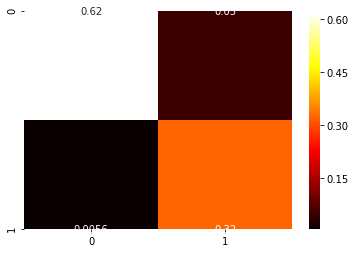

In [ ]:
rf_pred = rf.predict(X_val)
print_score(rf_pred, y_val, 'Random Forest')

#### Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Accuracy Score :  91.93


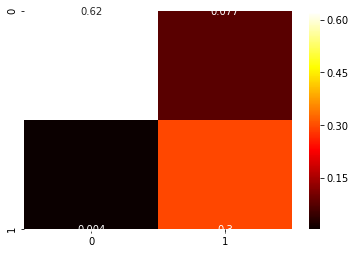

In [ ]:
gb_pred = gb.predict(X_val)
print_score(gb_pred, y_val, 'Gradient Boosting')

#### Logistic Regression

In [ ]:
log = LogisticRegression()
log.fit(X_train, y_train)

C:\Users\omrig\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy Score :  95.25


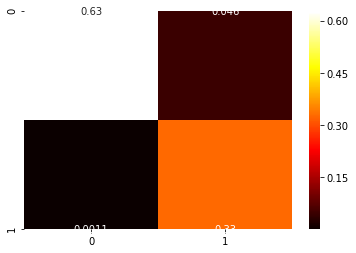

In [ ]:
log_pred = log.predict(X_val)
print_score(log_pred, y_val, 'Logistic Regression')

#### Dimensionality Reduction

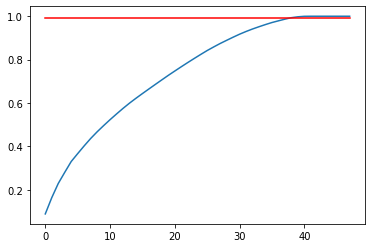

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = None)
Xp_train = pca.fit(X_train)

target_var = 0.99
explained_variance = pca.explained_variance_ratio_
ev_curve = np.cumsum(explained_variance)
plt.plot(ev_curve)
plt.plot(np.arange(len(explained_variance)),np.ones(len(explained_variance))*target_var, color='red')

In [ ]:
n_components = np.min(np.where(ev_curve>target_var))
n_components

38

In [ ]:
pca = PCA(n_components = n_components)
Xp_train = pca.fit_transform(X_train)
Xp_test = pca.transform(X_test)
Xp_val = pca.transform(X_val)

In [ ]:
rfp = RandomForestClassifier()
rfp.fit(Xp_train, y_train)

C:\Users\omrig\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy Score :  93.2


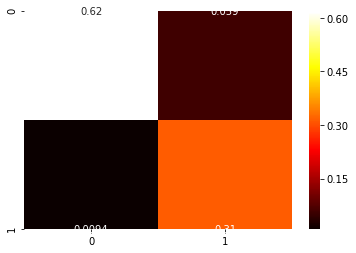

In [ ]:
rfp_pred = rfp.predict(Xp_val)
print_score(rfp_pred, y_val, 'Random Forest (PCA)')

In [ ]:
log_p = LogisticRegression()
log_p.fit(Xp_train, y_train)

C:\Users\omrig\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy Score :  81.81


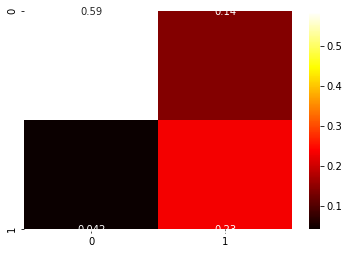

In [ ]:
log_p_pred = log_p.predict(Xp_val)
print_score(log_p_pred, y_val, 'Logistic Regression (PCA)')

At this point PCA doesn't seems very effective, especualy for logistic regression, therfore we'll procede with the original set of features

### Model Tuning

In [ ]:
rf_model = RandomForestClassifier()
#Run a gridsearch
rf_params = {"max_depth": [10,20,30,40],
            "max_features": [10,20,35],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}
            
rf_val = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 2) 

rf_val.fit(X_val, y_val)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 53.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [ ]:
rf_val.best_params_

{'max_depth': 30,
 'max_features': 35,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
rf_tuned = RandomForestClassifier(max_depth = rf_val.best_params_.get('max_depth'), 
                                  max_features = rf_val.best_params_.get('max_features'), 
                                  min_samples_split = rf_val.best_params_.get('min_samples_split'),
                                  n_estimators = rf_val.best_params_.get('n_estimators'))

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features=35, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy Score :  97.18


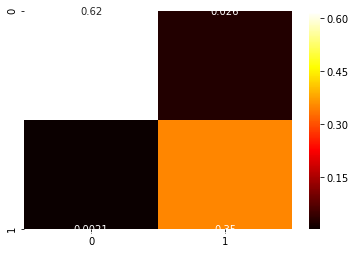

In [ ]:
#Evaluation on Test set
rft_pred = rf_tuned.predict(X_test)
print_score(rft_pred,y_test,'Random Forest (tuned)')

In [ ]:
C = np.logspace(2, 8, 4)
penalty = ['l1', 'l2']
max_iter = [100, 200, 500]
#log_params = dict(C=C, penalty=penalty, max_iter=max_iter) 
log_params = dict(C=C, penalty=['l2'], solver = ['lbfgs'], max_iter = max_iter) 
log_params

{'C': array([1.e+02, 1.e+04, 1.e+06, 1.e+08]),
 'penalty': ['l2'],
 'solver': ['lbfgs'],
 'max_iter': [100, 200, 500]}

In [ ]:
log_model = LogisticRegression()
#Run a gridsearch  
#log_val = GridSearchCV(log_model, log_params, cv=5, verbose=0)
log_val = GridSearchCV(log_model, log_params, cv=5, verbose=0)

log_val.fit(X_val, y_val)

C:\Users\omrig\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\omrig\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\omrig\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\omrig\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\omrig\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e+02, 1.e+04, 1.e+06, 1.e+08]),
                         'max_iter': [100, 200, 500], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
log_val.best_params_

{'C': 1000000.0, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}

In [ ]:
log_val.best_params_.get('C')

1000000.0

In [ ]:
log_tuned = LogisticRegression(C=log_val.best_params_.get('C'), max_iter=log_val.best_params_.get('max_iter'), solver= 'lbfgs')

log_tuned.fit(X_train, y_train)

C:\Users\omrig\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy Score :  99.94


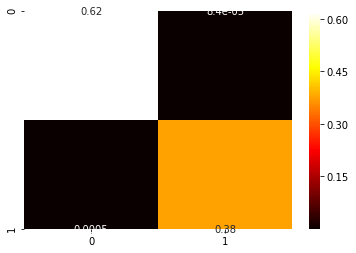

In [ ]:
#Evaluation on Test set
log_t_pred = log_tuned.predict(X_test)
print_score(log_t_pred,y_test,'Logistic Regression (tuned)')

### Evaluation Summary

In [ ]:
df_prediction

,Score
Top 1 Numeric Feat,65.22
Top 5 Numeric Feat,75.44
Top-1 Cat. Feat,75.1
Random Forest,94.43
Gradient Boosting,91.93
Logistic Regression,95.25
Random Forest (PCA),93.2
Logistic Regression (PCA),81.81
Random Forest (tuned),97.18
Logistic Regression (tuned),99.94


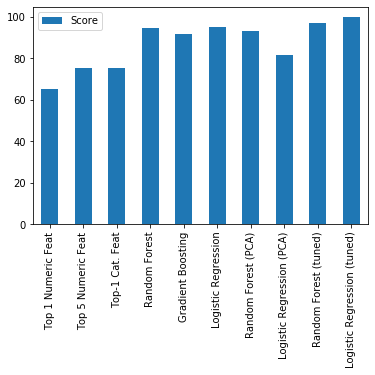

In [ ]:
df_prediction.plot(kind='bar')

Text(0.5, 0, 'Variable Importance Level')

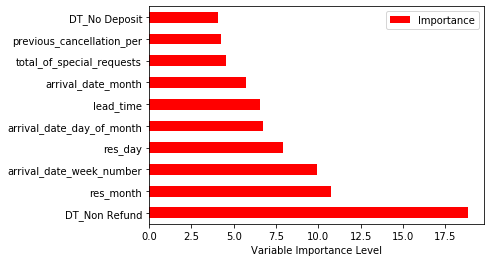

In [ ]:
Importance = pd.DataFrame( {"Importance": rf_tuned.feature_importances_*100},
                         index = train.drop('is_canceled',axis=1).columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = False)[:10].plot(kind ="barh", color = "r")

plt.xlabel("Variable Importance Level")

Check the wrongly classified example

In [ ]:
wrong = []
for i in np.arange(len(y_test)):
    if y_test.iloc[i]!=log_t_pred[i]:
        wrong.append(i)

In [ ]:
feat_ranked = Importance.sort_values(by = "Importance", axis = 0, ascending = True).index.values
#pd.concat([test[feat_ranked],log_t_pred],axis=1)
df_wrong = test[feat_ranked].iloc[wrong]
df_wrong['Prediction'] = log_t_pred[wrong]
df_wrong['Target'] = test['is_canceled'].iloc[wrong]
df_wrong

,MS_Undefined,DC_Undefined,DC_GDS,CT_Group,meal_Undefined,MS_Complementary,MS_Aviation,DT_Refundable,babies,CT_Contract,...,total_of_special_requests,arrival_date_month,lead_time,arrival_date_day_of_month,res_day,arrival_date_week_number,res_month,DT_Non Refund,Prediction,Target
113521,0,0,0,0,0,0,0,0,0,0,...,2,6,40,8,8,23,6,0,1,0
53481,0,0,0,0,0,1,0,0,0,0,...,1,6,0,22,22,26,6,0,1,0
35354,0,0,0,0,0,0,0,0,0,0,...,0,4,1,20,20,16,4,0,1,0
79667,0,0,0,0,0,0,0,0,0,0,...,1,11,3,12,12,46,11,0,0,1
7932,0,0,0,0,0,0,0,0,0,0,...,0,9,265,2,2,36,9,0,1,0
6755,0,0,0,0,0,0,0,0,0,0,...,2,6,186,29,29,27,6,0,1,0
111710,0,0,0,0,0,0,0,0,0,0,...,0,5,6,14,14,20,5,0,1,0


### Conclusions
Loistic Regression found to be the best model for cancellation prediction. Hyperparameters tuning of the model provided additional improvement while dimensionality reduction using PCA seemed to be counter-productive.
The model was selected using the validation set and training was performed on the training set, the test set wan not used or analyzed until the final estimation which indicated more than 99.99% accuracy. The wrongly classified examples set (7) contains mostly false positive predictions in which all costumers did not have non-refundable deposit status (the most important feature) and the reservation was made on the day of the arrival. 